<a href="https://colab.research.google.com/github/skovz99/Stock_Percentile/blob/main/Stock_Percentile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Run this cell prior to running cell below***

In [6]:
# define a function for stock percentile
  # high/low/close usage
  # how many periods to look into the future for
  # how periods into the past to look back to create the percentage
  # choosen value of percentile
  # whether to test to see if the stcok goes up or down
  # the percentage above or below the stock to check for when doing the percentile logic function
import pandas as pd
import numpy as np
import math
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
from scipy import stats
warnings.filterwarnings("ignore")

def stock_percentile(stock_ticker, h_l_c, future_periods, past_periods, percentile, gain_loss, percentage_check, keep = 'True'):
  # importing the stock information from the ticker
  price_history = yf.Ticker(stock_ticker).history(period='max', interval='1d', actions=False)
  df = pd.DataFrame(price_history)
  # running the arguments
  if past_periods == 0:
    df['Past Percentage Shift'] = ((df['Close'] - df['Open'])/(df['Open'])) * 100
    if h_l_c == 'h':
      df['Day Shift Up'] = df['High'].shift(periods = (future_periods) * -1)
      if gain_loss == 'gain':
        df['Percentage'] = df['High'] + (df['High'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] > df['Day Shift Up'], 1, 0)
      elif gain_loss == 'loss':
        df['Percentage'] = df['High'] - (df['High'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] < df['Day Shift Up'], 1, 0)
    elif h_l_c == 'l':
      df['Day Shift Up'] = df['Low'].shift(periods = (future_periods) * -1)
      if gain_loss == 'gain':
        df['Percentage'] = df['Low'] + (df['Low'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] > df['Day Shift Up'], 1, 0)
      elif gain_loss == 'loss':
        df['Percentage'] = df['Low'] - (df['Low'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] < df['Day Shift Up'], 1, 0)
    elif h_l_c == 'c':
      df['Day Shift Up'] = df['Close'].shift(periods = (future_periods) * -1)
      if gain_loss == 'gain':
        df['Percentage'] = df['Close'] + (df['Close'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] > df['Day Shift Up'], 1, 0)
      elif gain_loss == 'loss':
        df['Percentage'] = df['Close'] - (df['Close'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] < df['Day Shift Up'], 1, 0)
  elif past_periods > 0:
    if h_l_c == 'h':
      df['Past Percentage Shift'] = ((df['High'].shift(periods = past_periods) - df['High'])/(df['High'])) * 100
      df['Day Shift Up'] = df['High'].shift(periods = (future_periods) * -1)
      if gain_loss == 'gain':
        df['Percentage'] = df['High'] + (df['High'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] > df['Day Shift Up'], 1, 0)
      elif gain_loss == 'loss':
        df['Percentage'] = df['High'] - (df['High'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] < df['Day Shift Up'], 1, 0)
    elif h_l_c == 'l':
      df['Past Percentage Shift'] = ((df['Low'].shift(periods = past_periods) - df['Low'])/(df['Low'])) * 100
      df['Day Shift Up'] = df['Low'].shift(periods = (future_periods) * -1)
      if gain_loss == 'gain':
        df['Percentage'] = df['Low'] + (df['Low'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] > df['Day Shift Up'], 1, 0)
      elif gain_loss == 'loss':
        df['Percentage'] = df['Low'] - (df['Low'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] < df['Day Shift Up'], 1, 0)
    elif h_l_c == 'c':
      df['Past Percentage Shift'] = ((df['Close'].shift(periods = past_periods) - df['Close'])/(df['Close'])) * 100
      df['Day Shift Up'] = df['Close'].shift(periods = (future_periods) * -1)
      if gain_loss == 'gain':
        df['Percentage'] = df['Close'] + (df['Close'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] > df['Day Shift Up'], 1, 0)
      elif gain_loss == 'loss':
        df['Percentage'] = df['Close'] - (df['Close'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] < df['Day Shift Up'], 1, 0)
  # current data and determining whether to drop certain kinds of values depending on the keep parameter
  df = df.dropna()
  if keep == 'False':
    if gain_loss == 'gain':
      df['Drop'] = np.where(df['Past Percentage Shift'] < 0, np.nan, 1)
    elif gain_loss == 'loss':
      df['Drop'] = np.where(df['Past Percentage Shift'] > 0, np.nan, 1)
  df = df.dropna()
  current_past_percentage_shift = df['Past Percentage Shift'].iloc[-1]
  list_past_percentage_shift = list(df['Past Percentage Shift'])
  percentile_rank = stats.percentileofscore(list_past_percentage_shift, current_past_percentage_shift)
  # calculating the percentile
  df = df.dropna()
  numpy_percentile = np.percentile(df['Past Percentage Shift'], percentile)
  df['Numpy Percentile'] = np.where(df['Past Percentage Shift'] > numpy_percentile, 1, np.nan)
  df = df.dropna()
  accuracy = (sum(df['Logic'])/(len(df))) * 100
  # current day percentile (basically the last row of everything)
  return accuracy, percentile_rank


### ***Run the Function above with the specific parameters:***

stock_ticker = 'example',

h_l_c = 'h', 'l', or 'c' (allows you to use either the high, the low or the close of each days stock trading in the function)

future_periods = integer (allows you to specify how far out into the future to test the percentage_check argument)

past_periods = integer (allows you to specify how far back into the past to calculate percentage movement to use in determining percentiles)

percentile = integer (allows you to specify what percentile among the past_periods you want to profile, typically this will be executed outside the function in a for loop)

gain_loss = 'gain' or 'loss' (allows you to specify whether to calculate the probability of success of the percentage_check in the future_periods at a specific percentile for either trading above or below the stock)

percentage_check = integer (allows you to create a stock price testing limit either below or above the stock to test on parameters already choosen)

keep = boolean 'True' or 'False' (allows you to drop certain kinds of past percentage shifts depending on whether you choose gain or loss. If gain is choosen, all past percentage shifts that are below zero are removed from the numpy percentile when keep is 'False'. If loss if choosen, all past percentage shifts that are above zero are remved from the numpy percentile when keep is 'False'. When 'True' is choosen, all past percentage shifts are kept.)

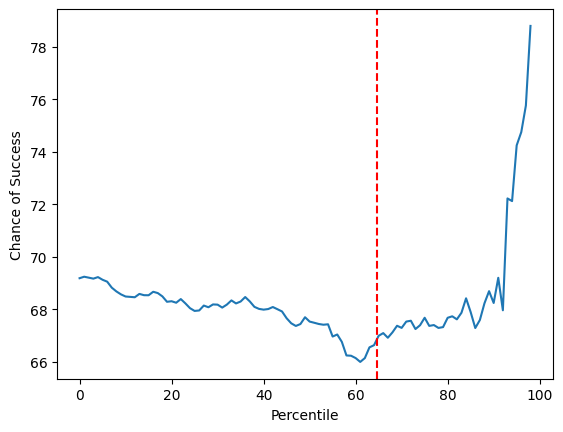

In [7]:
# this will return a plot of the accuracy of the percentage_check in the future_period using the past_periods for the numpy percentile for all percentiles between 1 and 99 step of 1
# red dashed line denotes the current percentile when using the parameters choose for past_periods
# chance of success represents the average of all the data points that are greater than that percentile
all_percentile = []
for x in range(1, 100):
  stock, percentile = stock_percentile(stock_ticker = 'TSLA', h_l_c = 'c', future_periods = 20, past_periods = 10, percentile = x, gain_loss = 'loss', percentage_check = 5, keep = 'True')
  all_percentile.append(stock)

plt.plot(all_percentile)
plt.xlabel('Percentile')
plt.ylabel('Chance of Success')
plt.axvline(x=percentile, color='red', linestyle='--')
plt.show()